In [1]:
#practice cca implementation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
x = np.array([[1.,1.,3.],[2.,3.,2.],[1.,1.,1.],[1.,1.,2.],[2.,2.,3.],[3,3,2],[1,3,2],[4,3,5],[5,5,5]])
y = np.array([[4,4,-1.07846],[3,3,1.214359],[2,2,0.307180],[2,3,-0.385641],[2,1,-0.078461],[1,1,1.61436],[1,2,0.81436],[2,1,-0.06410],[1,2,1.54590]])

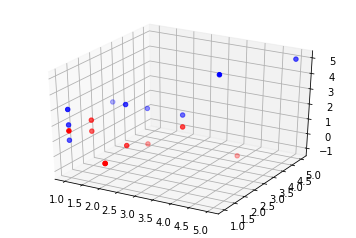

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(np.squeeze(np.asarray(x[:,0])), np.squeeze(np.asarray(x[:,1])), np.squeeze(np.asarray(x[:,2])), c='b', cmap='Greens');
ax.scatter3D(np.squeeze(np.asarray(y[:,0])), np.squeeze(np.asarray(y[:,1])), np.squeeze(np.asarray(y[:,2])), c='r', cmap='Greens');

In [4]:
def cov2(a,b):
    matrix = []
    for i in range(3):
        for j in range(3):
            matrix.append( np.cov(a[:,i],b[:,j])[0,1])
            
    matrix = np.asarray(matrix)
    matrix= np.reshape(matrix, (3,3))
    return matrix
    
Sxx = np.cov(x, rowvar=False)
Syy = np.cov(y, rowvar=False)
Sxy = cov2(x,y)
Syx = cov2(y,x)

aproduct = np.dot(np.dot(np.dot(np.linalg.inv(Sxx),Sxy), np.linalg.inv(Syy)),Syx)
bproduct = np.dot(np.dot(np.dot(np.linalg.inv(Syy),Syx), np.linalg.inv(Sxx)),Sxy)

R = np.linalg.eig(aproduct)[0]
Aweights = np.linalg.eig(aproduct)[1]
Bweights = np.linalg.eig(bproduct)[1]
A = np.asmatrix(Aweights)
B = np.asmatrix(Bweights)

In [5]:
A

matrix([[ 0.40146226,  0.79564482, -0.57763478],
        [ 0.59974765, -0.5844961 ,  0.42729591],
        [-0.69219276, -0.15910255,  0.69552589]])

In [6]:
B

matrix([[ 0.00209793, -0.83500978, -0.53806397],
        [-0.00253152,  0.13755997,  0.84280758],
        [ 0.9999946 , -0.53276254,  0.01274924]])

In [7]:
R

array([0.99999735, 0.26973061, 0.00797464])

In [8]:
Cvx1 = x*A[:,0]
Cvy1 = y*B[:,0]

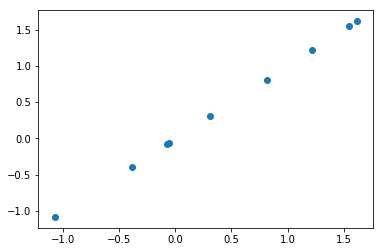

In [9]:
fig = plt.figure()
plt.scatter(np.squeeze(np.asarray(Cvx1)),np.squeeze(np.asarray(Cvy1)))

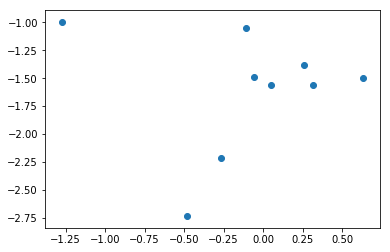

In [10]:
Cvx2 = x*A[:,1]
Cvy2 = y*B[:,1]
fig = plt.figure()
plt.scatter(np.squeeze(np.asarray(Cvx2)),np.squeeze(np.asarray(Cvy2)))

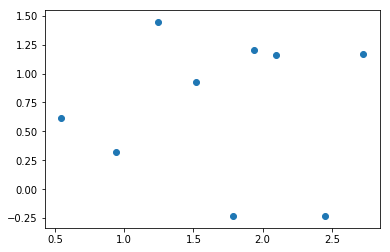

In [11]:
Cvx3 = x*A[:,2]
Cvy3 = y*B[:,2]
fig = plt.figure()
plt.scatter(np.squeeze(np.asarray(Cvx3)),np.squeeze(np.asarray(Cvy3)))